In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

import statsmodels.formula.api as sml
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

import os

In [2]:
# df_member = pd.read_csv("./Member_data.csv", encoding = "UTF-8")
# df_product = pd.read_csv("./new_product3.csv", encoding = "euc-kr")
df_sales = pd.read_csv("./delivery.csv", encoding = "euc-kr")
df_sales.head()


,고객번호,거주지역,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),구매금액,결제금액,물품대분류,상품명,추정수량,구매월,할인율,배송기간,출고기간,구매요일
0,201812310749735,인천,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,5,0.37,4,1,0
1,201812310749735,인천,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,51200,37769,기저귀,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,2,0.26,2,1,3
2,201812310749770,제주,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,5610,3800,휴지,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,2,0.32,4,1,3
3,201812310749771,부산,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,5,0.19,2,1,0
4,201812310749774,경남,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,5,0.21,2,1,4


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199517 entries, 0 to 199516
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   고객번호       199517 non-null  int64  
 1   거주지역       199517 non-null  object 
 2   주문번호       199517 non-null  object 
 3   구매일        199517 non-null  object 
 4   배송시작일      199517 non-null  object 
 5   배송완료일      199517 non-null  object 
 6   구매시월령(수정)  167786 non-null  float64
 7   구매금액       199517 non-null  int64  
 8   결제금액       199517 non-null  int64  
 9   물품대분류      199517 non-null  object 
 10  상품명        199517 non-null  object 
 11  추정수량       198047 non-null  float64
 12  구매월        199517 non-null  int64  
 13  할인율        198047 non-null  float64
 14  배송기간       199517 non-null  int64  
 15  출고기간       199517 non-null  int64  
 16  구매요일       199517 non-null  int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 25.9+ MB


In [4]:
df_sales.isnull().sum()

고객번호             0
거주지역             0
주문번호             0
구매일              0
배송시작일            0
배송완료일            0
구매시월령(수정)    31731
구매금액             0
결제금액             0
물품대분류            0
상품명              0
추정수량          1470
구매월              0
할인율           1470
배송기간             0
출고기간             0
구매요일             0
dtype: int64

## 배송시간 별 물품대분류 수

In [18]:
df1 = df_sales.groupby(['배송기간','물품대분류'])['고객번호'].count()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()

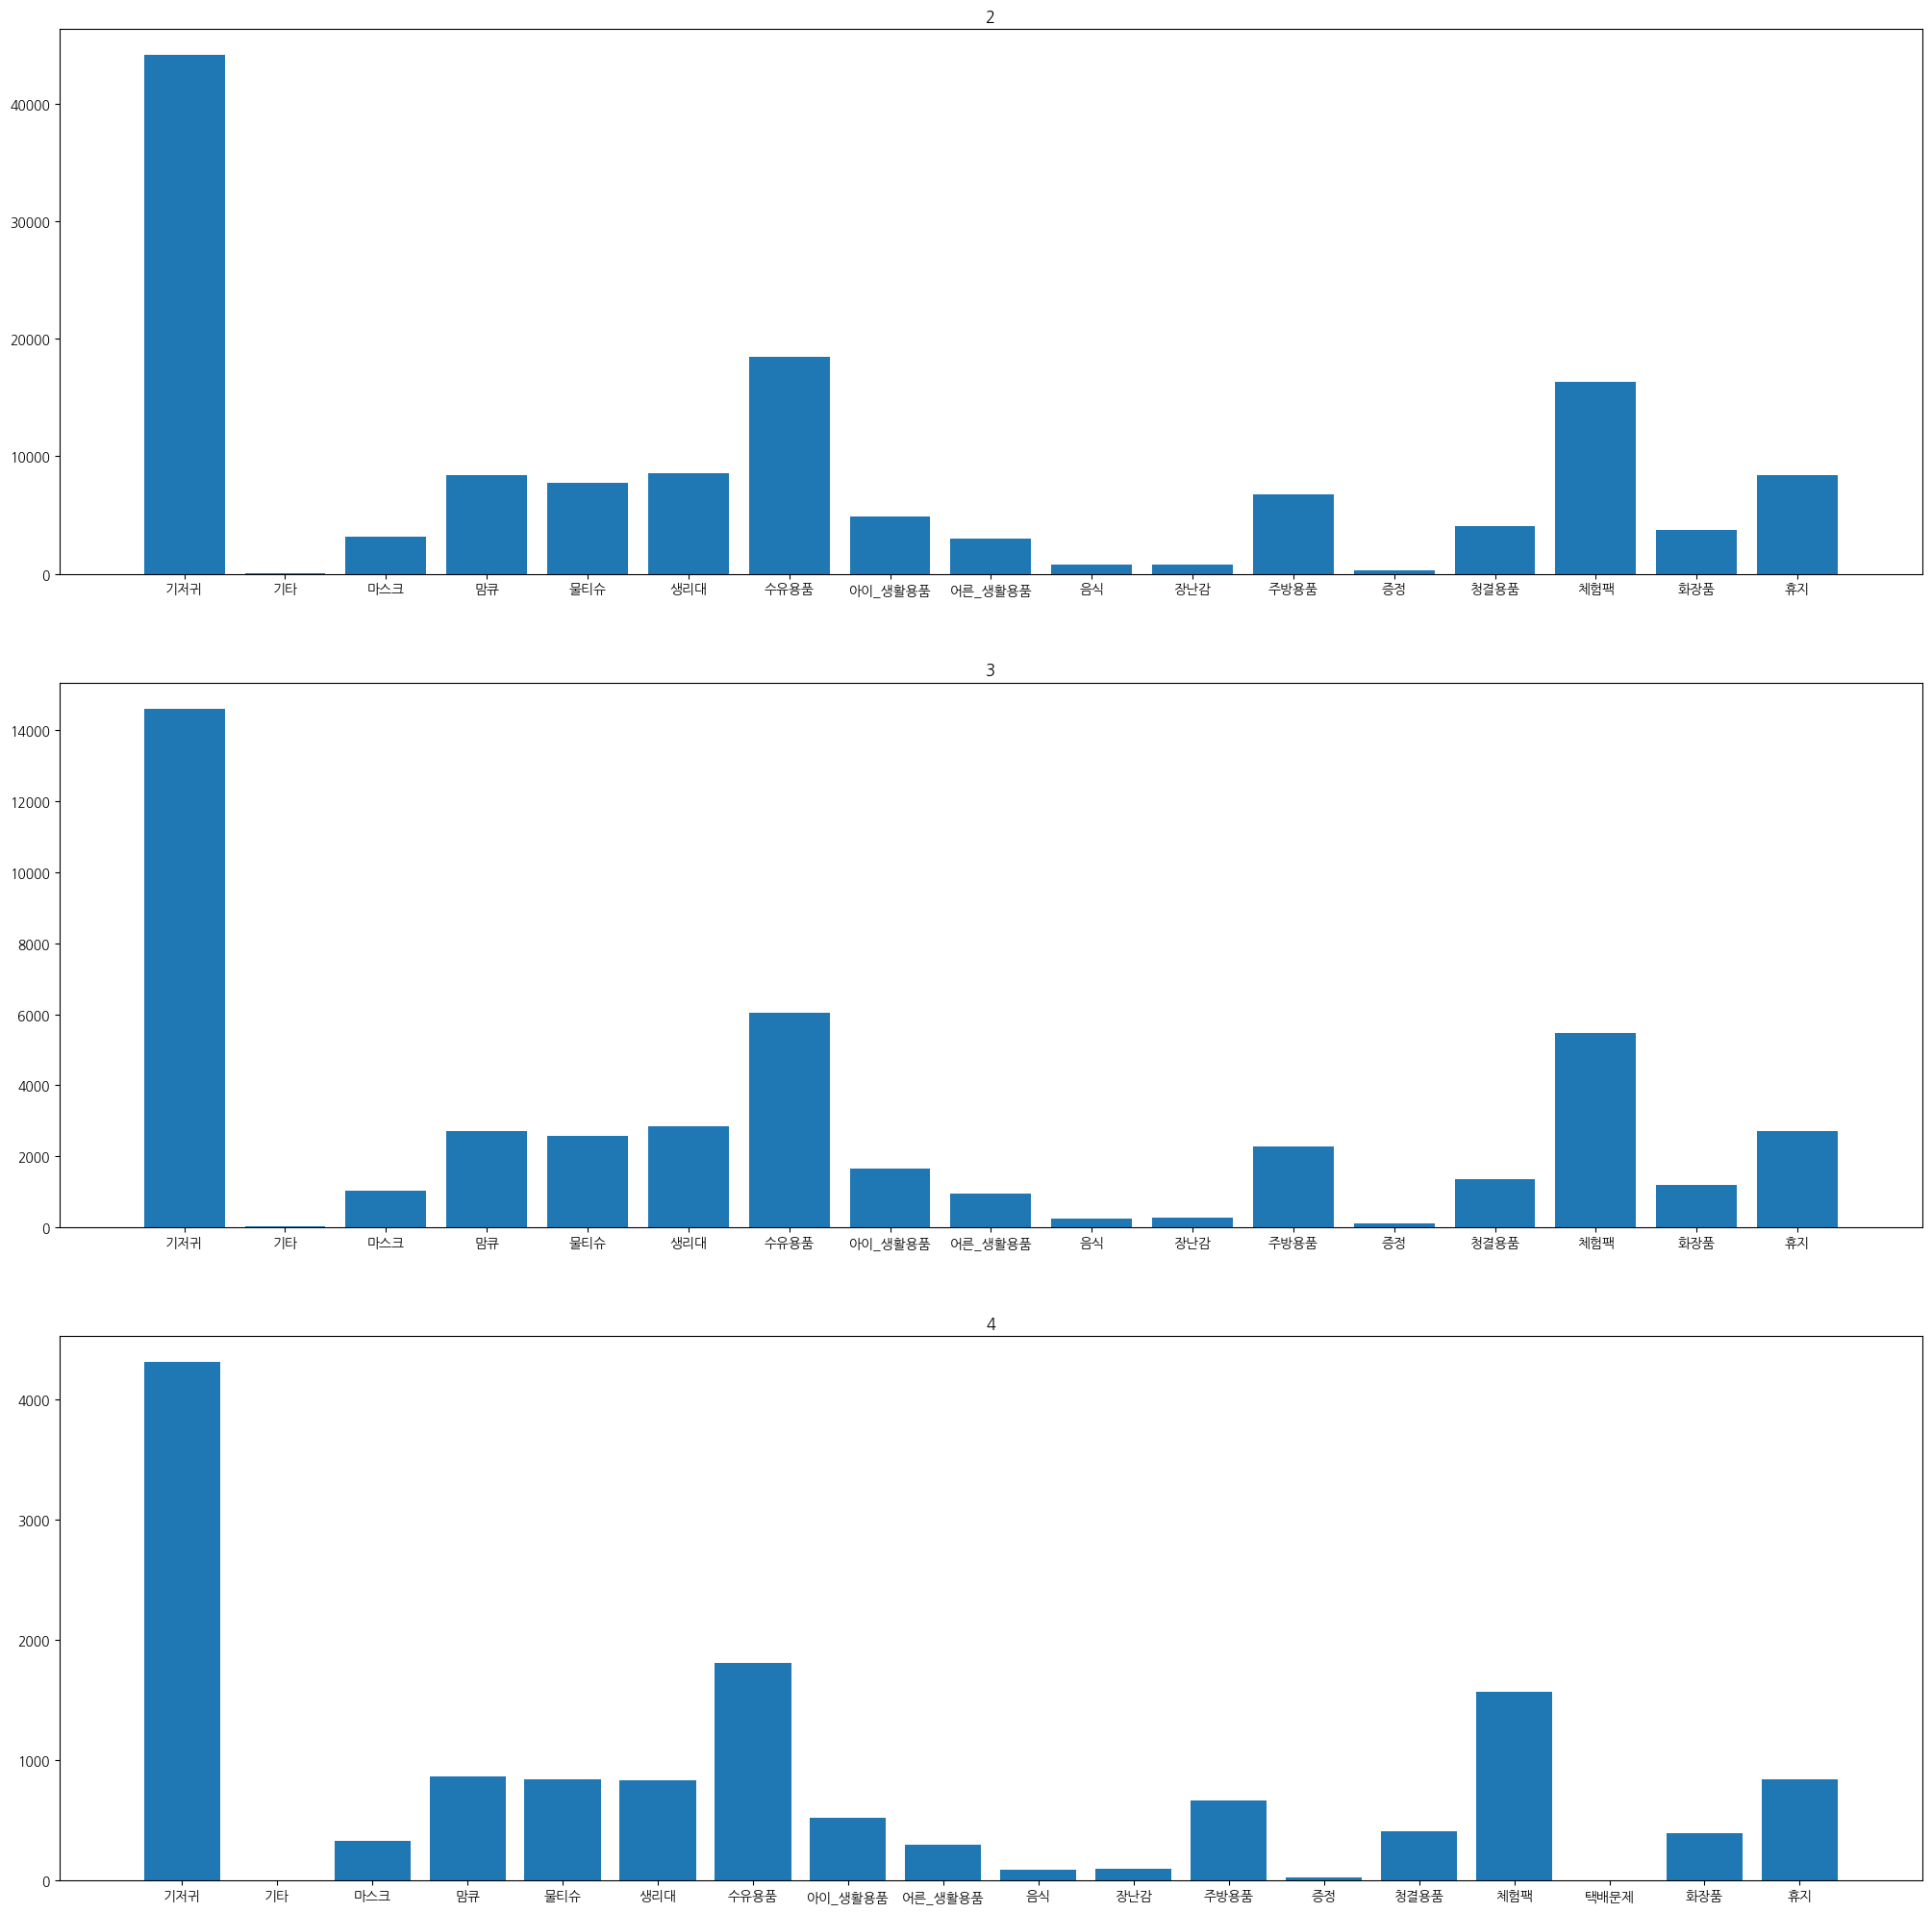

In [19]:
matplotlib.rc('font', family = 'NanumGothic')

from importlib import reload
reload(plt)
%matplotlib inline

abc = [2,3,4]

a=1
plt.figure(figsize=(25,25))
for i in abc:
    plt.subplot(3,1,a)
    plt.bar(df1[df1['배송기간'] ==  i]['물품대분류'],df1[df1['배송기간'] == i]['고객번호'])
    plt.title(i)
    a += 1

# Y축 스케일 조정 필요!

### 각 물품대분류 별 배송시간

In [34]:
df2 = df_sales.sort_values('구매일')
df2 = df2.groupby(['구매일','물품대분류'])['고객번호'].count()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2
# df2.to_csv("./시발.csv",encoding="euc-kr")

,구매일,물품대분류,고객번호
0,2019-01-01,기저귀,24
1,2019-01-01,마스크,1
2,2019-01-01,물티슈,2
3,2019-01-01,생리대,1
4,2019-01-01,수유용품,8
...,...,...,...
7797,2020-08-07,음식,3
7798,2020-08-07,청결용품,2
7799,2020-08-07,체험팩,4
7800,2020-08-07,화장품,1


KeyError: "None of [Index(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',\n       '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',\n       ...\n       '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',\n       '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07'],\n      dtype='object', length=579)] are in the [columns]"

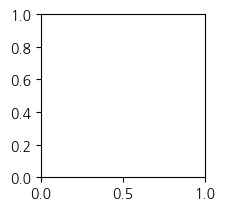

In [36]:
matplotlib.rc('font', family = 'NanumGothic')

from importlib import reload
reload(plt)
%matplotlib inline

# abc = [2,3,4]

a=1
plt.figure(figsize=(25,25))
for i in df2:
    plt.subplot(10,10,a)
    plt.bar(df2[df2['구매일'][df2['물품대분류']=='기저귀']],df2['구매일']['고객번호'])
    # plt.bar(df1[ df1['배송기간'] ==  i] ['물품대분류'],df1[df1['배송기간'] == i]['고객번호'])
    # plt.title(i)
    # a += 1

In [ ]:
df_grouped = copy.deepcopy(df)
df_grouped['물품대분류'] = df['물품대분류'].apply(lambda x: '기저귀' if '단계' in x else x)
df_grouped = df_grouped.groupby(['배송기간', '물품대분류'], as_index=False).sum()

df_grouped = df_grouped[['배송기간', '물품대분류', '구매금액']].sort_values(by=['배송기간', '구매금액'], ascending=False)
df_grouped['구매금액'] = df_grouped['구매금액'] // 10000
plt.figure(figsize=(15, 5))
sns.barplot(data=df_grouped, x='물품대분류', y='구매금액', hue='배송기간')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.title('각 지역의 물품대분류 별 구매금액(단위: 만원)')
plt.show()